# Imports

In [1]:
from ebay_delivery_prediction_project import preprocessing, Visualisation, preprocessing_models, postprocessing
preprocessing.import_test()

from datetime import datetime, timedelta

Preprocessing successfully imported.


In [2]:
training_data = preprocessing.read_data(rows_to_read = 100000)["train"]
print(training_data.columns)

Reading 100000 rows.
Reading all columns.
Index(['b2c_c2c', 'seller_id', 'declared_handling_days',
       'acceptance_scan_timestamp', 'shipment_method_id', 'shipping_fee',
       'carrier_min_estimate', 'carrier_max_estimate', 'item_zip', 'buyer_zip',
       'category_id', 'item_price', 'quantity', 'payment_datetime',
       'delivery_date', 'weight', 'weight_units', 'package_size',
       'record_number'],
      dtype='object')


# Basic Preprocessing

In [3]:
training_data = preprocessing.basic_preprocessing(training_data)

In [4]:
print(training_data.columns)

Index(['b2c_c2c', 'seller_id', 'declared_handling_days',
       'acceptance_scan_timestamp', 'shipment_method_id', 'shipping_fee',
       'carrier_min_estimate', 'carrier_max_estimate', 'item_zip', 'buyer_zip',
       'category_id', 'item_price', 'quantity', 'payment_datetime',
       'delivery_date', 'weight', 'weight_units', 'package_size',
       'record_number', 'delivery_calendar_days'],
      dtype='object')


## delivery_date

In [5]:
training_data = preprocessing.expand_datetime(df = training_data, date_column="delivery_date")

In [10]:
print(training_data.columns)

Index(['b2c_c2c', 'seller_id', 'declared_handling_days',
       'acceptance_scan_timestamp', 'shipment_method_id', 'shipping_fee',
       'carrier_min_estimate', 'carrier_max_estimate', 'item_zip', 'buyer_zip',
       'category_id', 'item_price', 'quantity', 'payment_datetime',
       'delivery_date', 'weight', 'weight_units', 'package_size',
       'record_number', 'delivery_calendar_days', 'delivery_date_year',
       'delivery_date_month', 'delivery_date_week', 'delivery_date_weekday',
       'delivery_date_day_of_year', 'payment_datetime_year',
       'payment_datetime_month', 'payment_datetime_week',
       'payment_datetime_weekday', 'payment_datetime_day_of_year'],
      dtype='object')


In [7]:
training_data["delivery_date_weekday"].value_counts()

1    22895
4    19587
5    18175
6    15595
3    15506
2     7769
7      473
Name: delivery_date_weekday, dtype: int64

Insights : 
1. Packages almost never deliver on sunday.
2. Packages rarely deliver on Saturday.

**Weekday is very important.**

## Payment Datetime

In [8]:
training_data = preprocessing.expand_datetime(df = training_data, date_column="payment_datetime")

In [9]:
training_data["delivery_date"][8].isocalendar()

(2019, 42, 2)

In [11]:
training_data["payment_datetime_weekday"].value_counts()

1    15210
7    14953
4    14242
2    14237
3    14117
5    14033
6    13208
Name: payment_datetime_weekday, dtype: int64

## delivery_calendar_days

In [17]:
histogram_array = [0 for ele in range(101)]
for ind, value in zip(training_data["delivery_calendar_days"].value_counts().index, training_data["delivery_calendar_days"].value_counts().values):
    print(ind)
    histogram_array[ind] = value

4
3
5
6
2
7
8
9
10
11
12
1
13
14
15
16
17
18
19
20
21
22
0
23
26
25
24
28
29
27
30
36
31
42
32
34
92
53
48
60
40
39
37
33
35
41
38
45
91
43
46
49
47
85
44
74
59
89
55
61
78
97
51
65
79
52
95
81
67
94
75
80
54
82
58
69
76
101


IndexError: list assignment index out of range

<AxesSubplot:xlabel='delivery_calendar_days', ylabel='Count'>

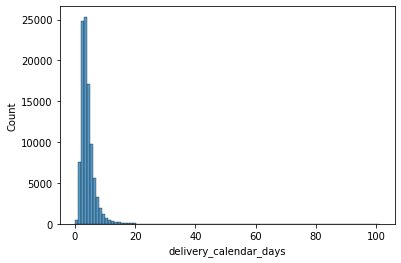

In [27]:
import seaborn as sns

sns.histplot(training_data, x = "delivery_calendar_days", bins = 100)

In [40]:
(training_data["delivery_calendar_days"]>14).sum()

968

In [46]:
(training_data["delivery_calendar_days"]<2).sum()

446

**We need to treat the data in buckets.** The one percent of orders that are arriving after 20 days are almost certainly poisoning the data.

Also we need an internal loss testing tool to see the improvements we get.

### Check correlation between weekdays and the delivery_calendar_days

## Next declared_handling_days